In [1]:
import psycopg2

In [2]:
import pandas as pd
import sklearn as sk
import matplotlib
import math

In [ ]:
!pip install --user sklearn
!pip install --user  pandas
!pip install --user matplotlib
!pip install --user pandas
!pip install --user yallowbrick

In [77]:
!pip install --user yellowbrick

  Using cached https://files.pythonhosted.org/packages/d1/cf/6d6ab47c0759d246262f9bdb53e89be3814bf1774bc51fffff995f5859f9/yellowbrick-1.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/29/50/a552a5aff252ae915f522e44642bb49a7b7b31677f9580cfd11bcc869976/scipy-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


# Carregando bibliotecas

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import psycopg2

In [4]:
conn  =  psycopg2.connect(host='localhost', database= 'postgres', user = 'postgres',password = 'senha')

In [5]:
df = pd.read_sql_query("""select hora, rubrica, local from fato_crime where rubrica <200000 limit 1000""",conn)

In [7]:
df.head()

,hora,rubrica,local
0,0,0,573336
1,90,0,573337
2,0,0,328492
3,0,0,573338
4,63,0,573339


In [55]:
df = df/df.max()

In [82]:
xrm = df.loc[:,["rubrica","hora", "local"]].values

In [71]:
xrm

array([[     0,     68, 120752],
       [     0,     82, 120753],
       [     0,      0, 120754],
       ..., 
       [     0,   1072, 176168],
       [     0,    763, 176169],
       [     0,     11,      0]])

KeyboardInterrupt: 

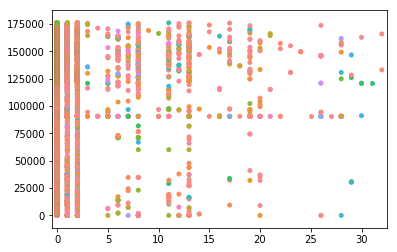

In [73]:
import seaborn as sns
sns.swarmplot(x='rubrica',y ='local',data=df,hue='hora')

Text(0,0.5,'local')

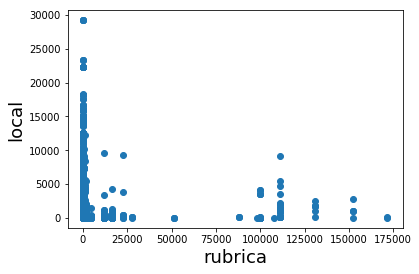

In [72]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('rubrica', fontsize=18)
plt.ylabel('local', fontsize=18)

# Criando Agrupamento

In [18]:
km = KMeans(n_clusters = 5)
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Comparando os resultados

In [19]:
new_labels = km.labels_
new_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('rubrica', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('rubrica', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)

In [ ]:
xrm = df.loc[:,["local","hora"]].values

In [ ]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('local', fontsize=18)
plt.ylabel('hora', fontsize=18)

In [ ]:
km = KMeans(n_clusters = 5)
km.fit(xrm)

In [ ]:
new_labels = km.labels_
new_labels

In [ ]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('local', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('local', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)

In [7]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 11):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
        print(n)

    return wcss

In [8]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [44]:
wcss_result = calculate_wcss(df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [78]:
from yellowbrick.cluster import KElbowVisualizer

In [79]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings=True)

In [80]:
visualizer.fit(xrm) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

TypeError: flip() missing 1 required positional argument: 'axis'

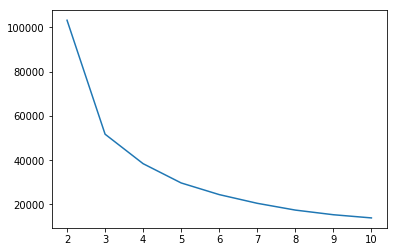

In [10]:
plt.plot([2,3,4,5,6,7,8,9,10], wcss_result[0:])

In [11]:
n_otimo_cluster = optimal_number_of_clusters(wcss_result)

In [42]:
xrm_crime = df.loc[:,["local","hora", "rubrica"]].values

In [43]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans_crime = KMeans(n_clusters=n_otimo_cluster)
clusters_crime = kmeans_crime.fit(xrm_crime)

In [36]:
xrm_crime

array([[  8.83203549e-01,   0.00000000e+00],
       [  8.83205090e-01,   1.55461895e-03],
       [  5.06030147e-01,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   1.27824224e-03],
       [  0.00000000e+00,   2.40102259e-03],
       [  0.00000000e+00,   5.52753403e-04]])

In [37]:
new_labels = km.labels_
new_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0.5,1,'Com agrupamento')

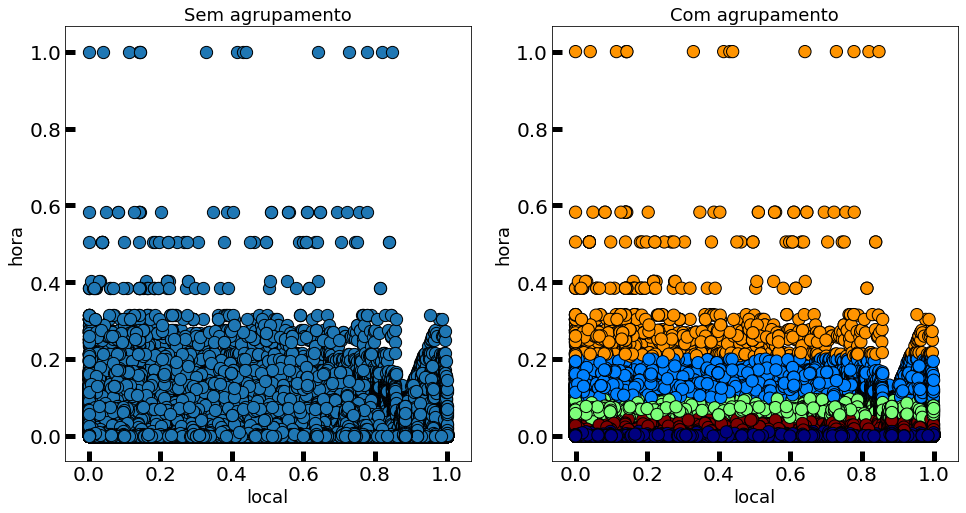

In [38]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm_crime[:, 0], xrm_crime[:, 1], cmap='gist_rainbow',
                    edgecolor='k', s=150)
axes[1].scatter(xrm_crime[:, 0], xrm_crime[:, 1], c=new_labels, cmap='jet',
                    edgecolor='k', s=150)
axes[0].set_xlabel('local', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('local', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)